In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt
import torch.nn.init as init
import time
import random

In [2]:
N_x = 61
N_y = 61

x_l = 0
y_b = 0
x_r = 1
y_t = 1
xb = 0.5
yb = 0.5
r = 0.2
ri = 0.22

N_t = 2000
dt = 0.001

f_lim = 1

# material params
k1 = 0.0263
k2 = 0.0044


In [3]:
# X, Y matrix
X = np.linspace(x_l,x_r,N_x)
dx = X[1] - X[0]
X = np.tile(X,N_y)
X = np.reshape(X, (N_x,N_y))

Y = np.linspace(y_b,y_t,N_y)
dy = Y[1] - Y[0]
Y = np.repeat(Y,N_x)
Y = np.reshape(Y, (N_x,N_y))

# liquid fraction, battery and initial temperature matrix
phi = np.zeros((N_x,N_y))
f = np.zeros((N_x,N_y))
T = np.zeros((N_x,N_y))

# Initialising the aforementioned matrix
for i in range(N_x):
    for j in range(N_y):
        dist = ( X[i][j] - xb )**2 + ( Y[i][j] - yb )**2
        
        if dist<=r**2:
            phi[i][j] = 1
            T[i][j] = 1
            
        if dist<=ri**2:
            f[i][j] = 1

In [4]:
aN = np.zeros((N_x,N_y))
aS = np.zeros((N_x,N_y))
aE = np.zeros((N_x,N_y))
aW = np.zeros((N_x,N_y))
aP = np.zeros((N_x,N_y))

for i in range(N_x):
    for j in range(N_y):
        
        if Y[i][j]!=y_t:
            aN[i][j] = k1*dt/dy**2
            
        if Y[i][j]!=y_b:
            aS[i][j] = k1*dt/dy**2
            
        if X[i][j]!=x_l:
            aW[i][j] = k1*dt/dx**2
            
        if X[i][j]!=x_r:
            aE[i][j] = k1*dt/dx**2
            
        aP[i][j] = 1 - (aN[i][j] + aS[i][j] + aW[i][j] + aE[i][j])

In [5]:
T_str = []
T_str.append(T.copy())
T_new = T.copy()

f_str = []
f_str.append(f.copy())
f_new = f.copy()

for t in range(N_t):
    
    T = T_str[-1].copy()
    f = f_str[-1].copy()
    for i in range(N_x):
        for j in range(N_y):
            
            if phi[i][j]==0:
                if ( X[i][j]!=x_l and X[i][j]!=x_r and Y[i][j]!=y_t and Y[i][j]!=y_b ):
                    
                    if f[i][j]<f_lim:
                        f_new[i][j] = ( aN[i][j]*T[i+1][j] + aS[i][j]*T[i-1][j] + aW[i][j]*T[i][j-1] 
                                       + aE[i][j]*T[i][j+1] + ( aP[i][j] - 1 )*T[i][j] )*k2/k1 + f[i][j]
                        
                        # Temperature correction
                        if f_new[i][j]>=f_lim:
                            T_new[i][j] = T[i][j] + k1/k2*(f_new[i][j]-f_lim)
                            f_new[i][j] = f_lim
                    else:
                        T_new[i][j] = ( aN[i][j]*T[i+1][j] + aS[i][j]*T[i-1][j] + 
                                       aW[i][j]*T[i][j-1] + aE[i][j]*T[i][j+1] + aP[i][j]*T[i][j] )
    
    T_str.append(T_new.copy())
    f_str.append(f_new.copy())

C:\Users\sanjeet\AppData\Local\Temp/ipykernel_7196/2712140628.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

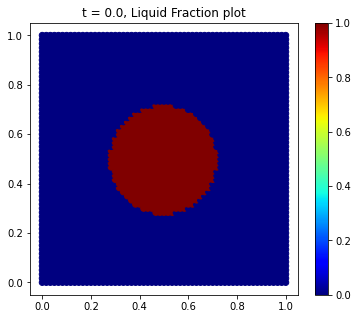

<Figure size 432x288 with 0 Axes>

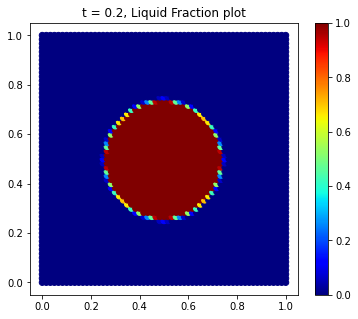

<Figure size 432x288 with 0 Axes>

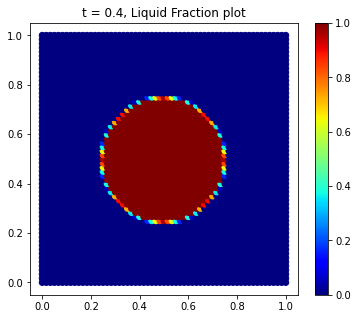

<Figure size 432x288 with 0 Axes>

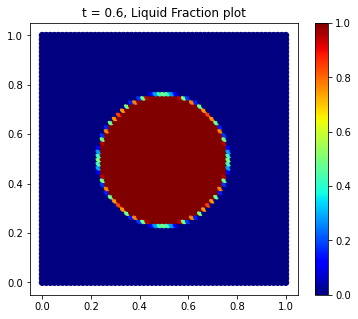

<Figure size 432x288 with 0 Axes>

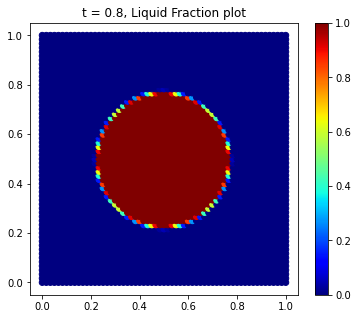

<Figure size 432x288 with 0 Axes>

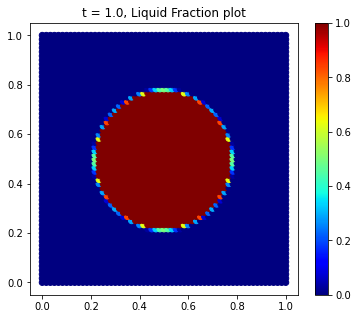

<Figure size 432x288 with 0 Axes>

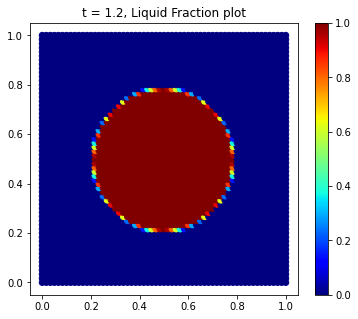

<Figure size 432x288 with 0 Axes>

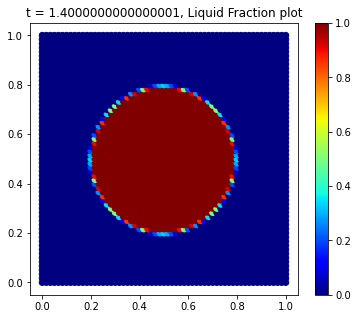

<Figure size 432x288 with 0 Axes>

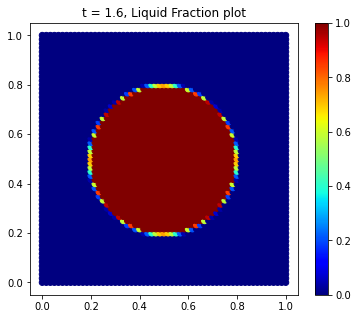

<Figure size 432x288 with 0 Axes>

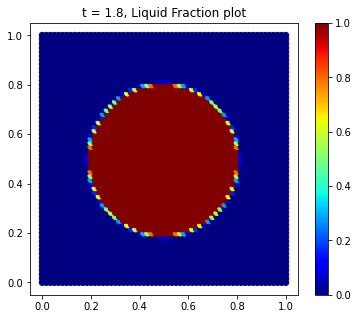

<Figure size 432x288 with 0 Axes>

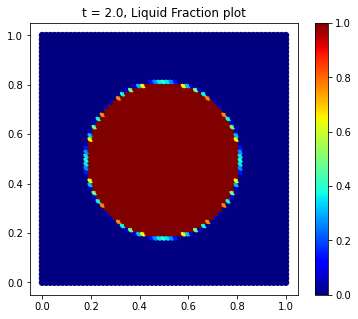

In [6]:
k = 0
for i in range(len(T_str)):
    if i%200==0:
        plt.figure()
        plt.figure(figsize=(6,5))
        sc = plt.scatter(X, Y, c = f_str[i], cmap=plt.cm.jet)
        plt.colorbar(sc)
        plt.clim(0,1)
        plt.title('t = '+ str(k*dt)+', Liquid Fraction plot')
    k = k+1

plt.show()

C:\Users\sanjeet\AppData\Local\Temp/ipykernel_7196/3393328051.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

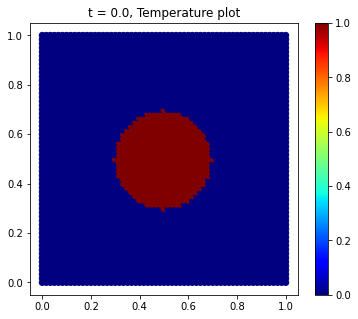

<Figure size 432x288 with 0 Axes>

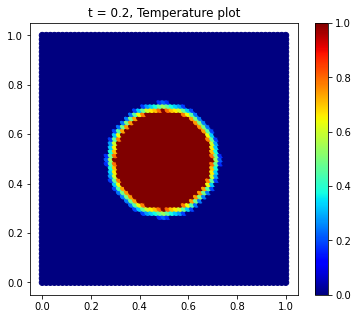

<Figure size 432x288 with 0 Axes>

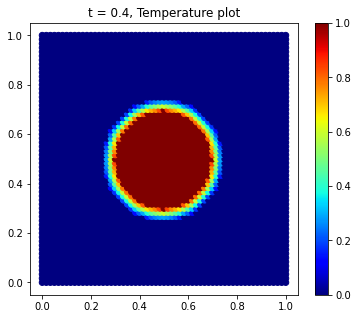

<Figure size 432x288 with 0 Axes>

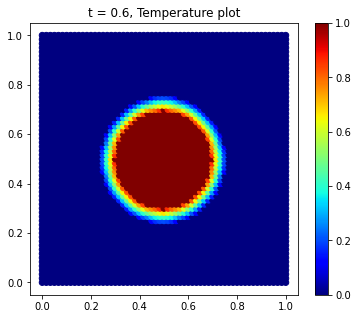

<Figure size 432x288 with 0 Axes>

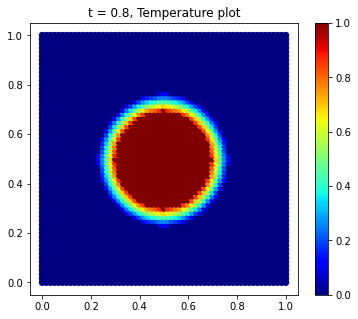

<Figure size 432x288 with 0 Axes>

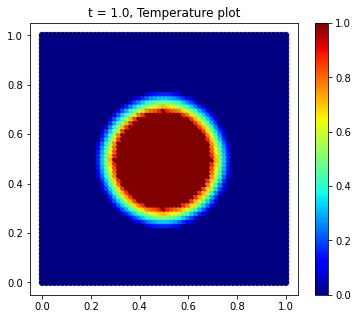

<Figure size 432x288 with 0 Axes>

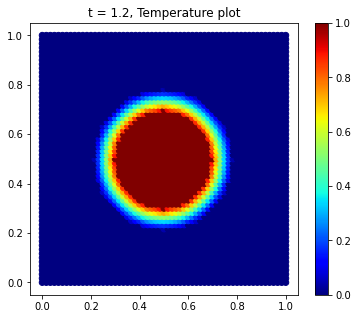

<Figure size 432x288 with 0 Axes>

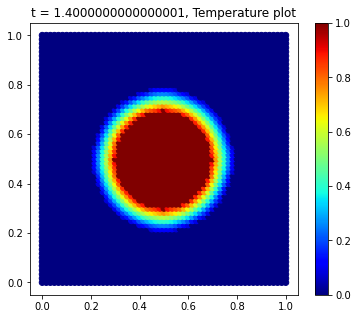

<Figure size 432x288 with 0 Axes>

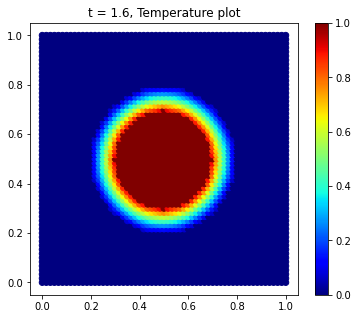

<Figure size 432x288 with 0 Axes>

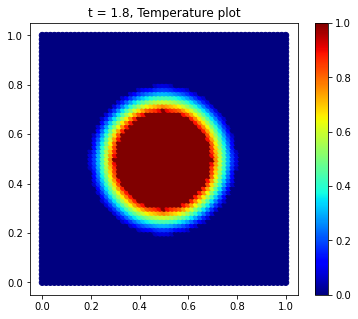

<Figure size 432x288 with 0 Axes>

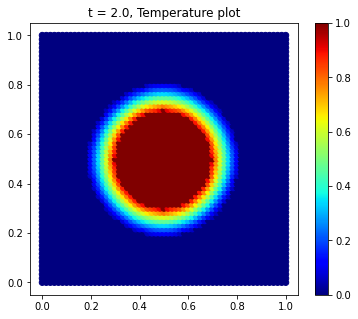

In [7]:
k = 0
for i in range(len(T_str)):
    if i%200==0:
        plt.figure()
        plt.figure(figsize=(6,5))
        sc = plt.scatter(X, Y, c = T_str[i], cmap=plt.cm.jet)
        plt.colorbar(sc)
        plt.clim(0,1)
        plt.title('t = '+ str(k*dt)+', Temperature plot')
    k = k+1

plt.show()